In [22]:
import numpy as np
import matplotlib.pyplot as plt

#### Generate Binary Data for hamming

In [23]:
np.random.seed(42)
X = np.random.randint(0, 2, (30, 5))

#### Plot initial data

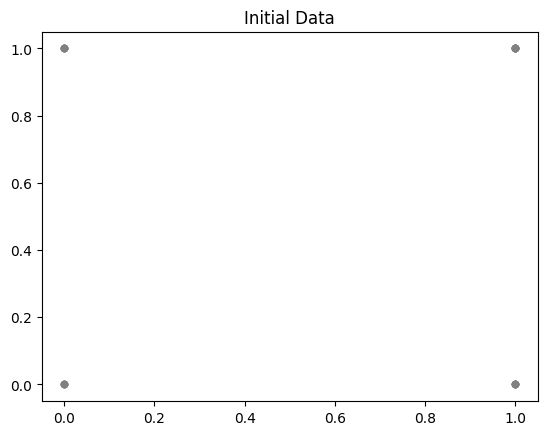

In [24]:
plt.scatter(X[:, 0], X[:, 1], s=20, color='gray')
plt.title("Initial Data")
plt.show()

#### Initialize Parameters

In [25]:
k = 3
centroids = X[np.random.choice(range(len(X)), k, replace=False)]

In [26]:
def hamming_distance(a, b):
    return np.sum(a != b)

#### K-Means Algorithm

In [27]:
max_iters = 100
for _ in range(max_iters):
    # Assign clusters
    labels = []
    for point in X:
        distances = [hamming_distance(point, centroid) for centroid in centroids]
        labels.append(np.argmin(distances))
    labels = np.array(labels)

    new_centroids = []
    for i in range(k):
        cluster_points = X[labels == i]
        if len(cluster_points) > 0:
            majority_vote = (np.sum(cluster_points, axis=0) >= (len(cluster_points) / 2)).astype(int)
            new_centroids.append(majority_vote)
        else:
            new_centroids.append(centroids[i])
    new_centroids = np.array(new_centroids)

    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids

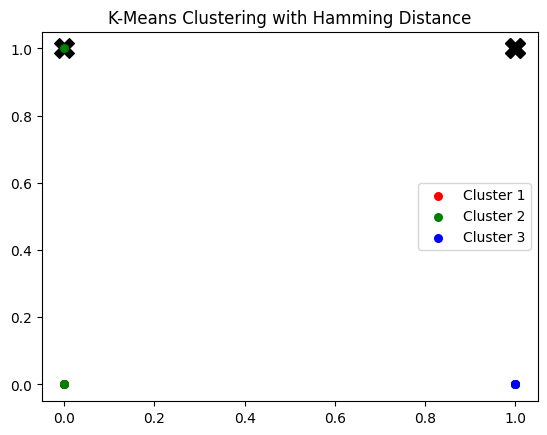

In [28]:
colors = ['red', 'green', 'blue']
for i in range(k):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], s=30, color=colors[i], label=f'Cluster {i+1}')
    plt.scatter(centroids[i, 0], centroids[i, 1], s=200, color='black', marker='X')

plt.title("K-Means Clustering with Hamming Distance")
plt.legend()
plt.show()
